In [1]:
# Determine Bounding Box: Calculate the bounding box that encloses all body joints.

# Normalize Joint Coordinates: Translate and scale joint coordinates based on the bounding box.

# Crop Image: Crop the image to the bounding box region.

# Resize Image: Resize the cropped image to a fixed size (e.g., 220x220 pixels).

# Normalize Pixel Values

In [2]:
# first figure out how to load data
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

mat = loadmat("lsp/joints.mat")

In [3]:
mats = np.array(mat["joints"])
joints = mats.transpose(2, 0, 1)
joints.shape  # in the format image, joins, (X,Y,Visibility)

(10000, 14, 3)

In [4]:
joints[0]

array([[  0.        , -26.10911452,   0.        ],
       [ 26.03094352,  86.41022512,   1.        ],
       [ 50.60790641,  75.70079791,   1.        ],
       [ 71.72971103,  87.56715594,   1.        ],
       [ 49.16955998,  89.00550237,   1.        ],
       [ 23.13861646,  94.79015649,   1.        ],
       [131.31164842,  13.80499887,   1.        ],
       [111.64382442,  34.62975369,   1.        ],
       [ 93.71139667,  49.09138898,   1.        ],
       [102.38837784,  68.46216316,   1.        ],
       [110.78394341,  88.42703696,   1.        ],
       [139.12874857,  89.58396778,   1.        ],
       [ 96.88513933,  56.61143933,   1.        ],
       [116.56859752,  53.42206246,   1.        ]])

In [5]:
body_parts = [
    "right_ankle",
    "right_knee",
    "right_hip",
    "left_hip",
    "left_knee",
    "left_ankle",
    "right_wrist",
    "right_elbow",
    "right_shoulder",
    "left_shoulder",
    "left_elbow",
    "left_wrist",
    "neck",
    "head_top",
]

connections = [
    ("right_ankle", "right_knee"),
    ("right_knee", "right_hip"),
    ("right_hip", "left_hip"),
    ("left_hip", "left_knee"),
    ("left_knee", "left_ankle"),
    ("right_wrist", "right_elbow"),
    ("right_elbow", "right_shoulder"),
    ("right_shoulder", "neck"),
    ("left_shoulder", "neck"),
    ("left_shoulder", "left_elbow"),
    ("left_elbow", "left_wrist"),
    ("neck", "head_top"),
    ("right_shoulder", "right_hip"),
    ("left_shoulder", "left_hip"),
]


connections_indices = [
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (6, 7),
    (7, 8),
    (8, 12),
    (9, 12),
    (9, 10),
    (10, 11),
    (12, 13),
    (8, 2),
    (9, 3),
]

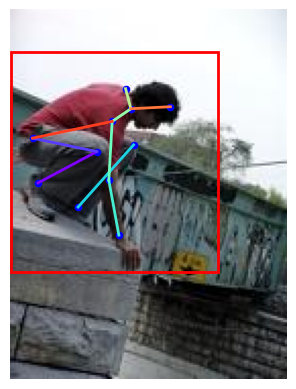

In [6]:
from PIL import Image
import matplotlib.patches as patches
import math


def to_five_digit_string(number):
    return f"{number:05}"


def create_bounding_box_coords(joints):
    joints = np.copy(joints)

    x = joints[joints[:, 2] == 1][:, 0]  # in view x
    y = joints[joints[:, 2] == 1][:, 1]  # in view y

    return {
        "min_X": np.min(x),
        "max_X": np.max(x),
        "min_Y": np.min(y),
        "max_Y": np.max(y),
    }


def load_image(index):
    file_name = "lsp/images/im" + to_five_digit_string(index + 1) + ".jpg"
    image = Image.open(file_name)
    return np.array(image)  # Convert the image to a numpy array


def display_image_with_pose(image_np, joints, bb=False):
    plt.imshow(image_np)

    # load pose x,y
    for x, y, o in joints:
        if o == 1:
            plt.scatter(x, y, c="blue", s=20)

    cmap = plt.get_cmap("rainbow", len(connections))

    for index, connection in enumerate(connections_indices):
        joints1_idx, joints2_idx = connection
        if joints[joints1_idx][2] == joints[joints2_idx][2] == 1:
            x = [joints[joints1_idx][0], joints[joints2_idx][0]]
            y = [joints[joints1_idx][1], joints[joints2_idx][1]]

            plt.plot(x, y, color=cmap(index), linewidth=2)

    if bb:
        # display bounding box
        bb = create_bounding_box_coords(joints)

        width = bb["max_X"] - bb["min_X"]
        height = bb["max_Y"] - bb["min_Y"]

        width *= 1.5
        height *= 1.5

        # Calculate the new minimum X and Y
        min_X = bb["min_X"] - (width - (bb["max_X"] - bb["min_X"])) / 2
        min_Y = bb["min_Y"] - (height - (bb["max_Y"] - bb["min_Y"])) / 2

        # Make sure the new bounding box is within the image's dimensions
        min_X = max(0, min_X)
        min_Y = max(0, min_Y)
        max_X = min(image_np.shape[1] - 1, min_X + width)
        max_Y = min(image_np.shape[0] - 1, min_Y + height)

        rect = patches.Rectangle(
            (min_X, min_Y),
            max_X - min_X,
            max_Y - min_Y,
            linewidth=2,
            edgecolor="r",
            facecolor="none",
        )
        plt.gca().add_patch(rect)

    # Display the image using matplotlib

    plt.axis("off")  # Hide the axis
    plt.show()


display_image_with_pose(load_image(26), joints[26], bb=True)

[[80.68813095644381, 158.6066868013525, 1.0], [77.75979039265509, 134.12152594268525, 1.0], [71.23276624445128, 89.10269992588495, 1.0], [85.59221937049965, 87.79729509624418, 1.0], [94.73005317798498, 126.2890969648407, 1.0], [86.24492178532003, 133.15129262335765, 1.0], [24.238192377383868, 21.22164878456535, 1.0], [38.59764550343225, 37.204037644761705, 1.0], [65.02327300075468, 44.71893571809906, 1.0], [89.17326234910877, 45.353997527113485, 1.0], [116.26923286705755, 35.24593040030056, 1.0], [132.26926233305986, 20.551305763939016, 1.0], [77.10708797783471, 39.81484730404322, 1.0], [74.8138092230604, 19.581072444611422, 1.0]]


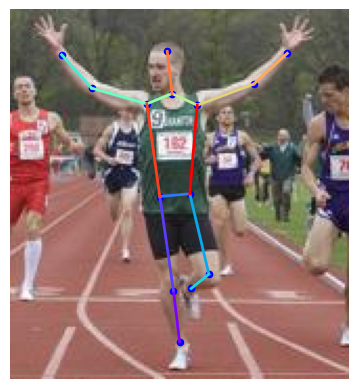

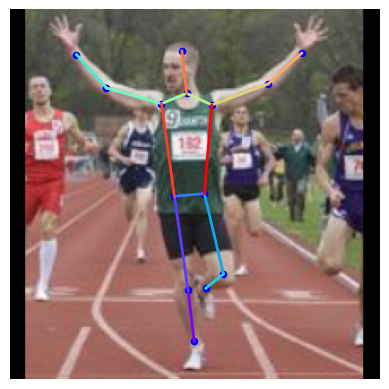

In [7]:
import cv2


def crop_to_bounding_box(image_np, joints):
    bb = create_bounding_box_coords(joints)

    width = bb["max_X"] - bb["min_X"]
    height = bb["max_Y"] - bb["min_Y"]

    width *= 1.5
    height *= 1.5

    # Calculate the new minimum X and Y
    min_X = bb["min_X"] - (width - (bb["max_X"] - bb["min_X"])) / 2
    min_Y = bb["min_Y"] - (height - (bb["max_Y"] - bb["min_Y"])) / 2

    # Make sure the new bounding box is within the image's dimensions
    min_X = max(0, min_X)
    min_Y = max(0, min_Y)
    max_X = min(image_np.shape[1], min_X + width)
    max_Y = min(image_np.shape[0], min_Y + height)

    cropped_image = image_np[int(min_Y) : int(max_Y), int(min_X) : int(max_X)]

    # Normalize the joints' x and y coordinates
    normalized_joints = []
    for joint in joints:
        normalized_x = joint[0] - min_X
        normalized_y = joint[1] - min_Y
        normalized_joints.append([normalized_x, normalized_y, joint[2]])

    print(normalized_joints)
    return cropped_image, np.array(normalized_joints), {"min_X": min_X, "min_Y": min_Y}


def resize(img, joints, size=220, joint_args=None):
    ## resize
    h, w = img.shape[:2]
    ratio = w / h
    if ratio > 1:
        new_w = size
        new_h = int(size / ratio)
    else:
        new_h = size
        new_w = int(size * ratio)

    w_change = new_w / w
    h_change = new_h / h

    resized_joints = []
    for joint in joints:
        resized_x = joint[0] * w_change
        resized_y = joint[1] * h_change
        resized_joints.append([resized_x, resized_y, joint[2]])

    resized_image = cv2.resize(img, (new_w, new_h))

    ## pad
    pad_top = (size - new_h) // 2
    pad_bottom = size - new_h - pad_top
    pad_left = (size - new_w) // 2
    pad_right = size - new_w - pad_left

    padded_image = cv2.copyMakeBorder(
        resized_image,
        pad_top,
        pad_bottom,
        pad_left,
        pad_right,
        cv2.BORDER_CONSTANT,
        value=0,
    )

    padded_joints = []
    for joint in resized_joints:
        padded_x = joint[0] + pad_left
        padded_y = joint[1] + pad_top
        padded_joints.append([padded_x, padded_y, joint[2]])

    args = {}
    if joint_args:
        args = {**joint_args}

    args.update(
        {
            "w_change": w_change,
            "h_change": h_change,
            "pad_left": pad_left,
            "pad_top": pad_top,
        }
    )

    return padded_image, np.array(padded_joints), args


img, joint_, args = crop_to_bounding_box(load_image(101), joints[101])
display_image_with_pose(img, joint_, bb=False)
new_img, new_joints, args = resize(img, joint_, 220, args)
display_image_with_pose(new_img, new_joints, bb=False)

[[187.67186458104368, 66.83147264107652, 1.0], [154.0410664481206, 66.24715375459715, 1.0], [114.98908753508356, 72.83697230766991, 1.0], [122.81246818183497, 61.44275402132243, 1.0], [163.03308486783072, 61.44275402132243, 1.0], [-38.134922882868054, -92.91481849030782, 0.0], [37.53437291620874, 70.43477244103255, 1.0], [54.9340908691496, 59.62487304116442, 1.0], [69.96407111581308, 43.39379286118228, 1.0], [95.18716971550533, 37.42075535494885, 1.0], [-38.134922882868054, -92.91481849030782, 0.0], [72.36627098245043, 55.404792194369065, 1.0], [82.55938933547924, 33.2006745081535, 1.0], [84.96158920211658, 14.567394461533986, 1.0]]


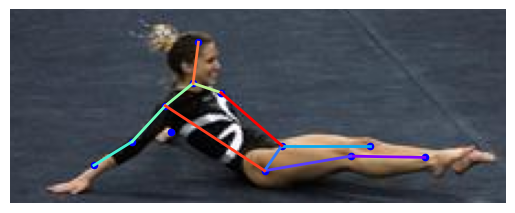

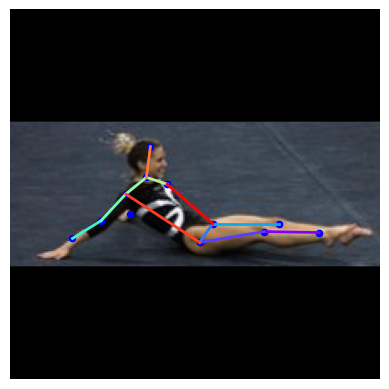

In [9]:
img, joint_, args = crop_to_bounding_box(load_image(102), joints[102])
display_image_with_pose(img, joint_, bb=False)
new_img, new_joints, args = resize(img, joint_, 220, args)
display_image_with_pose(new_img, new_joints, bb=False)

In [10]:
from LSPDataset import LSPDataset
from LSPTransforms import LSPTransforms
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

mats = loadmat("lsp/joints.mat")
mats = np.array(mats["joints"])
joints = mats.transpose(2, 0, 1)

train_size = 0.8
val_size = 0.1
test_size = 0.1


# create training, validation and test sets
indices = range(len(joints))
indices = np.random.permutation(indices)

train_indices = indices[: int(train_size * len(joints))]
val_indices = indices[
    int(train_size * len(joints)) : int((train_size + val_size) * len(joints))
]
test_indices = indices[int((train_size + val_size) * len(joints)) :]

print(f"Training set size: {len(train_indices)}")
print(f"Validation set size: {len(val_indices)}")
print(f"Test set size: {len(test_indices)}")

# filter the joints matrix to only include train_indices
train_joints = joints[train_indices]
print(train_joints.shape)

# calculate x mean and std
x_coords = []
for joint_set in joints:
    for joint in joint_set:
        x_coords.append(joint[0])

x_mean = np.mean(x_coords)
x_std = np.std(x_coords)

# calculate y mean and std
y_coords = []
for joint_set in joints:
    for joint in joint_set:
        y_coords.append(joint[1])

y_mean = np.mean(y_coords)
y_std = np.std(y_coords)

print(f"X mean: {x_mean}, X std: {x_std}")
print(f"Y mean: {y_mean}, Y std: {y_std}")

Training set size: 8000
Validation set size: 1000
Test set size: 1000
(8000, 14, 3)
X mean: 122.38735782865373, X std: 94.5487753318415
Y mean: 95.29156478503185, Y std: 76.44367159523902
